# HW02: Practice with logistic regression and decision tree

Name:Zhuoyu Jiang
NetId:zjiang299

## Hello Students:

- Start by downloading HW02.ipynb from this folder. Then develop it into your solution.
- Write code where you see "... your code here ..." below.
  (You are welcome to use more than one cell.)
- If you have questions, please ask them in class, office hours, or piazza. Our TA
  and I are very happy to help with the programming (provided you start early
  enough, and provided we are not helping so much that we undermine your learning).
- When you are done, run these Notebook commands:
  - Shift-L (once, so that line numbers are visible)
  - Kernel > Restart and Run All (run all cells from scratch)
  - Esc S (save)
  - File > Download as > HTML
- Turn in:
  - HW02.ipynb to Canvas's HW02.ipynb assignment
  - HW02.html to Canvas's HW02.html assignment
  - As a check, download your files from Canvas to a new 'junk' folder. Try 'Kernel > Restart
  and Run All' on the '.ipynb' file to make sure it works. Glance through the '.html' file.
- Turn in partial solutions to Canvas before the deadline. e.g. Turn in part 1,
  then parts 1 and 2, then your whole solution. That way we can award partial credit
  even if you miss the deadline. We will grade your last submission before the deadline.

In [56]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


# 1. Logistic regression

# 1a. Make a logistic regression model
relating the probability an iris has Species='virginica' to its 'Petal.Length'
and classifying irises as 'virginica' or not 'virginica' (i.e. 'versicolor').
- Read [http://www.stat.wisc.edu/~jgillett/451/data/iris.csv](http://www.stat.wisc.edu/~jgillett/451/data/iris.csv) into a DataFrame.
- Make a second data frame that excludes the 'setosa' rows (leaving the 'virginica' and 'versicolor' rows) and includes only the Petal.Length and Species columns.
- Use `linear_model.LogisticRegression(C=1000)` so we all get the same results (they vary with `C`).
- Train the model using $X=$ petal length and $y=$ whether the Species is 'virginica'.
  (I used "y = (df['Species'] == 'virginica').to_numpy().astype(int)",
  which sets y to zeros and ones.)
- Report its accuracy on the training data.
- Report the estimated P(Species=virginica | Petal.Length=5).
- Report the predicited Species for Petal.Length=5.
- Make a plot showing:
  - the data points
  - the estimated logistic curve
  - and what I have called the "sample proportion" of y == 1 at each unique Petal.Length value
  - a legend and title and other labels necessary to make the plot easy to read

In [45]:
url = 'http://www.stat.wisc.edu/~jgillett/451/data/iris.csv'
df = pd.read_csv(url)
df_new = df.loc[df['Species'].isin(['versicolor', 'virginica']), ['Petal.Length', 'Species']]
X = df[['Petal.Length']].values
y = (df['Species'] == 'virginica').to_numpy().astype(int)
model = linear_model.LogisticRegression(C=1000)
model.fit(X,y)
accuracy = model.score(X,y)
print('The accuracy is ', accuracy)
p_virginica=model.predict_proba([[5]])[:,1][0]
print('P(Species=virginica | Petal.Length=5) = ',p_virginica)
predict_species= 'virginca' if p_virginica>=0.5 else 'versicolor'
print('The predicited Species for Petal.Length=5: ', predict_species)

The accuracy is  0.9533333333333334
P(Species=virginica | Petal.Length=5) =  0.7725391826769191
The predicited Species for Petal.Length=5:  virginca


In [50]:
p_virginica=model.predict_proba([[5]])
p_virginica

array([[0.22746082, 0.77253918]])

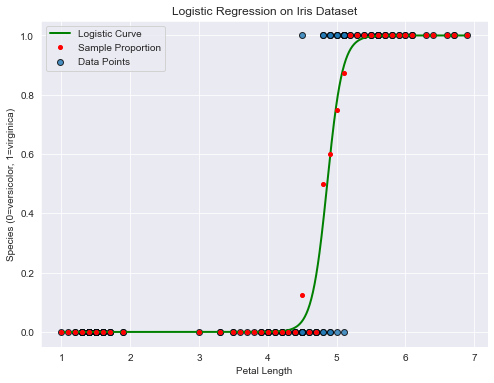

In [33]:
petal_len_grid = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
prob_grid = model.predict_proba(petal_len_grid)[:, 1]
proportion = df.groupby('Petal.Length')['Species'].apply(lambda x: np.mean(x == 'virginica')).values
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X, y, alpha=0.8, edgecolor='k', label='Data Points')
ax.plot(petal_len_grid, prob_grid, 'g-', linewidth=2, label='Logistic Curve')
ax.plot(np.unique(X), proportion, 'ro', markersize=4, label='Sample Proportion')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Species (0=versicolor, 1=virginica)')
ax.set_title('Logistic Regression on Iris Dataset')
ax.legend(loc='best')
plt.show()

## 1b. Do some work with logistic regression by hand.
Consider the logistic regression model, $P(y
_i = 1) = \frac{1}{1 + e^{-(\mathbf{w x} + b)}}\,.$

Logistic regression is named after the log-odds of success, $\ln
  \frac{p}{1 - p}$, where $p = P(y_i = 1)$. Show that this log-odds
  equals $\mathbf{w x} + b$. (That is, start with $\ln
  \frac{p}{1 - p}$ and connect it in a series of equalities to $\mathbf{w x} + b$.)
  

#### ... your Latex math in a Markdown cell here ...

$\begin{align*} % In this Latex context, "&" separates columns and "\\" ends a line.
   \ln \frac{p}{1 - p} & = lnp+ln(1-p)\\
    & = -ln(1+e^{-(wx+b)})-(ln(e^{-(wx+b)})-ln(1+e^{-(wx+b)}))\\
    & = -ln(e^{-(wx+b)})\\
    & = \mathbf{w x} + b\\
 \end{align*}
$

### 1c. Do some more work with logistic regression by hand.

I ran some Python/scikit-learn code to make the model pictured here: ![](toyLogistic.png)

From the image and without the help of running code, match each code line from the top list with its output from the bottom list.

1. `model.intercept_`
2. `model.coef_`
3. `model.predict(X)`
4. `model.predict_proba(X)[:, 1]`

A. `array([0, 0, 0, 1])`,
B. `array([0.003, 0.5, 0.5, 0.997])`,
C. `array([5.832])`,
D. `array([0.])`

1:D,2:c,3:A,4:B

# 2. Decision tree

## 2a. Make a decision tree model on a Titanic data set.
Read the data from [http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv](http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv).

These data are described at [https://www.kaggle.com/competitions/titanic/data](https://www.kaggle.com/competitions/titanic/data) (click on the small down-arrow to see the "Data Dictionary"), which is where they are from.

- Retain only the Survived, Pclass, Sex, and Age columns.
- Display the  first seven rows (passengers).
  Notice that the Age column includes NaN, indicating a missing value.
- Drop rows with missing data via `df.dropna()`. Display your data frame's shape before
  and after dropping rows. (It should be (714, 4) after dropping rows.)
- Add a column called 'Female' that indicates whether a passenger is Female. You can make this column via `df.Sex == 'female'`. This gives bool values True and False, which are interpreted as 1 and 0 when used in an arithmetic context.
- Train a decision tree with `max_depth=None` to decided whether a passenger
  `Survived` from the other three columns. Report its accuracy (with 3 decimal places)
  on training data along with the tree's depth (which is available in `clf.tree_.max_depth`).
- Train another tree with `max_depth=2`. Report its accuracy (with 3 decimal places).
  Use `tree.plot_tree()` to display it, including feature_names to make the tree easy to read.

   Survived  Pclass     Sex   Age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0
5         0       3    male   NaN
6         0       1    male  54.0
Data frame shape after dropping rows: (714, 4)
Accuracy on training data with max_depth=None: 0.896
Tree depth: 15
Accuracy on training data with max_depth=2: 0.803


[Text(0.5, 0.8333333333333334, 'Female <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]\nclass = Did not survive'),
 Text(0.25, 0.5, 'Age <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]\nclass = Did not survive'),
 Text(0.125, 0.16666666666666666, 'gini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = Survived'),
 Text(0.375, 0.16666666666666666, 'gini = 0.295\nsamples = 429\nvalue = [352, 77]\nclass = Did not survive'),
 Text(0.75, 0.5, 'Pclass <= 2.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]\nclass = Survived'),
 Text(0.625, 0.16666666666666666, 'gini = 0.107\nsamples = 159\nvalue = [9, 150]\nclass = Survived'),
 Text(0.875, 0.16666666666666666, 'gini = 0.497\nsamples = 102\nvalue = [55, 47]\nclass = Did not survive')]

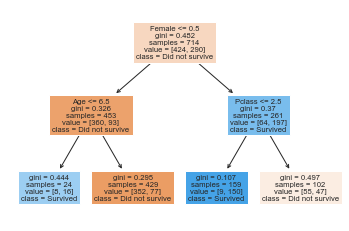

In [55]:
# Read the data
url = "http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv"
df = pd.read_csv(url)

# Retain only the desired columns
df = df[['Survived', 'Pclass', 'Sex', 'Age']]

# Display the first 7 rows
print(df.head(7))

# Drop rows with missing data
df = df.dropna()
print("Data frame shape after dropping rows:", df.shape)

# Add a column 'Female'
df['Female'] = (df['Sex'] == 'female').astype(int)

# Train a decision tree with max_depth=None
X = df[['Pclass', 'Age', 'Female']]
y = df['Survived']
clf = DecisionTreeClassifier(max_depth=None, random_state=0)
clf.fit(X, y)
train_acc = clf.score(X, y)
tree_depth = clf.tree_.max_depth
print("Accuracy on training data with max_depth=None:", round(train_acc, 3))
print("Tree depth:", tree_depth)

# Train another tree with max_depth=2 and plot it
clf2 = DecisionTreeClassifier(max_depth=2, random_state=0)
clf2.fit(X, y)
train_acc2 = clf2.score(X, y)
print("Accuracy on training data with max_depth=2:", round(train_acc2, 3))

# Plot the decision tree
feature_names = ['Pclass', 'Age', 'Female']
class_names = ['Did not survive', 'Survived']
tree.plot_tree(clf2, feature_names=feature_names, class_names=class_names, filled=True)

## 2b. Which features are used in the (max_depth=2) decision-making? Answer in a markdown cell.

`Pclass`,`Female`

 ## 2c. What proportion (in the cleaned-up data) of females survived? What proportion of males survived?
 Answer in two sentences via print(), with each proportion rounded to three decimal places.
 
 Hint: There are many ways to do this. One quick way is to find the average of the `Female`
 column for each subset.

In [57]:
url = 'http://www.stat.wisc.edu/~jgillett/451/data/kaggle_titanic_train.csv'
df = pd.read_csv(url)
df = df[['Survived', 'Pclass', 'Sex', 'Age']]
df.dropna(inplace=True)
df['Female'] = (df['Sex'] == 'female').astype(int)
survival_props = df.groupby('Sex')['Survived'].mean()

print('Proportion of females who survived:', survival_props['female'])
print('Proportion of males who survived:', survival_props['male'])

Proportion of females who survived: 0.7547892720306514
Proportion of males who survived: 0.2052980132450331


## 2d. Do some decision tree calculations by hand.
Consider a decision tree node containing the following set of examples $S =
\{(\mathbf{x}, y)\}$ where $\mathbf{x} = (x_1, x_2)$:

((4, 9), 1)

((2, 6), 0)

((5, 7), 0)

((3, 8), 1)

Find the entropy of $S$.

Proportion of class 0: 2/4 = 0.5
Proportion of class 1: 2/4 = 0.5
The entropy of S is then given by the formula:

$$H(S) = - \sum_{i=1}^{c} p_i \log_2 p_i$$

where c is the number of classes, and p_i is the proportion of examples in S that belong to class i.

Plugging in the values we computed above, we get:

$$H(S) = - \left(0.5 \log_2 0.5 + 0.5 \log_2 0.5 \right) = 1$$

So the entropy of S is 1.

 ## 2e. Do some more decision tree calculations by hand.
Find a (feature, threshold) pair that yields the best split for this node.

In this case, we have two features, x1 and x2. We can try all possible thresholds for each feature, but since there are only four examples, it's easy to see that the best split is achieved by splitting on x1 = 3.5. Specifically, the split is:

Examples with x1 <= 3.5: ((2, 6), 0)
Examples with x1 > 3.5: ((4, 9), 1), ((5, 7), 0), ((3, 8), 1)
This split achieves an information gain of 0.5, which is the maximum possible given the proportions of classes in the node. We can verify this by computing the entropy of each child node and taking a weighted average:

Entropy of child node with x1 <= 3.5: - (1/1) log2 (1/1) - (0/1) log2 (0/1) = 0
Entropy of child node with x1 > 3.5: - (1/3) log2 (1/3) - (2/3) log2 (2/3) = 0.9183
Weighted average entropy: (1/4) * 0 + (3/4) * 0.9183 = 0.6887
Information gain: 1 - 0.6887 = 0.3113
So the best (feature, threshold) pair for splitting this node is (x1, 3.5).